# Academic Integrity Statement

As a matter of Departmental policy, **we are required to give you a 0** unless you **type your name** after the following statement: 

> *I certify on my honor that I have neither given nor received any help, or used any non-permitted resources, while completing this evaluation.*

\[TYPE YOUR NAME HERE\]

# PIC16A: Midterm Exam, Problem 2

This exam is graded out of 100 points. There are 55 points in Problem 1 and 45 points in Problem 2. Each problem is divided into multiple parts, some of which may be completed independently of others. The exam is intended to require approximately 90 minutes, and may be worked on at any time between the hours of 12:00am and 11:59, Pacific Time, on Friday, October 30th. You are free to work on the exam in excess of 90 minutes during this time period. 

**Permissible resources**: You may freely use lectures notes and videos; any **pre-existing** online resources; Google; etc. 

**Impermissible resources**: You may not collaborate with each other or solicit help from any in-person or online resources.

**Example:** browsing an online Python forum is fine; posting on the forum is not. 

### Submission Expectations

Each of the two notebooks should be submitted as .pdf files following the usual submission format. You should also include comments and docstrings in your class and function definitions unless stated otherwise. 

### Partial Credit

Let us give you partial credit! 

1. Are you completely stuck on Part (A)? Can't get your code to run? Breathe, and write down (as a comment or "docstring") your approach. What is your idea? What have you tried so far? What is your best guess for what's not working? **We will give you partial credit for these notes**. 
2. Being stuck on Part (A) doesn't mean you can't do Part (B)! Do your best, and again write down everything you can think of that is relevant. Write the code that you would expect to run if part (A) were working. Explicitly state that you are unable to test your code in (B) because you couldn't get (A) to run. If your answers fully demonstrate understanding of the problem, then you can receive **up to full credit** this way. 

### Part A (25 points)

Review your solution (or the posted solution) to Problem 4 of Homework 1. Repurpose this code to implement a `random_walk` class. This class should:

1. Possess a `self.step()` method that causes the walk to move forward or backward. 
2. Possess a `self.multistep(k_steps=1)` method that causes the walk to take `k_steps` consecutively. 
3. Possess a `self.plot()` method that plots the walk using the `plot()` function of `matplotlib.pyplot`. You will need to import this module -- check the HW1 solutions to see how. 
4. Possess instance variables that collect the full history of the positions and step directions of the walk. 

It is not necessary to incorporate upper and lower bounds this time. 

Test your class by running the following code and showing the result. 

```
rw = random_walk()
rw.multistep(1000000)
rw.plot()
```

Don't forget comments and docstrings!

### Your Solution

In [39]:
# class definition here
import random
from matplotlib import pyplot as plt

class random_walk:
    """
    an object-oriented approach to random walks. 
    Stores current position, a log of previous positions, and a log of steps. 
    """
    
    def __init__(self):
        self.p = 0
        self.positions = [self.p]
        self.steps    = []
        
    def step(self):
        """
        increment the current position by either -1 or 1 with equal probability
        append the direction of movement to self.steps and the position to self.positions
        """
        # pick a random direction
        s = random.choice([-1, 1])
        
        # update steps, current position, and position log
        self.steps.append(s)
        self.p += s
        self.positions.append(self.p)
        
    def multistep(self, k_steps=1):
        """
        take a user-specified number of self.step()'s
        """
        for i in range(k_steps):
            self.step()
    
    def plot(self):
        """
        visualize the walk using the plot() function of matplotlib.pyplot
        """
        plt.plot(self.positions)

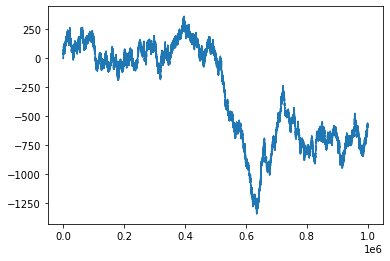

In [27]:
# test code -- run but do not modify
rw = random_walk()
rw.multistep(1000000)
rw.plot()

### Part B (10 points)

Copy/paste your solution from above into the code block below. Implement  `self.__iter__()` and any additional required methods or classes in order to add support for iteration through the positions visited by the walk. For example, the following code should work. 

```
rw = random_walk()
rw.multistep(5)

for i in rw:
    print(i)
    
0 
-1
-2
-1
0
1
```

The printed numbers are the 6 total positions visited by the walk when calling `rw.multistep(5)` (including the initial position of 0). 

Since we are working with random numbers, your exactly outputs may look different from mine. 

Test your solution by running the four lines of code below the cell for your class definition. Note: because it's a *random* walk, you won't get exactly the same numbers -- that's ok!

It is possible to obtain full credit on this part, even if you did not completely solve Part A. 

**Note**: There is a long way and a short way to solve this problem. Short solutions will receive full credit; long solutions can receive up to 8/10 points. 

### Your Solution

In [3]:
# class definition here

import random
from matplotlib import pyplot as plt

class random_walk:
    """
    See previous part for example docstrings and comments
    """
    def __init__(self):
        self.p = 0
        self.positions = [self.p]
        self.steps = []
        
    def step(self):
        s = random.choice([-1, 1])
        self.steps.append(s)
        self.p += s
        self.positions.append(self.p)
        
    def multistep(self, k_steps=1):
        for i in range(k_steps):
            self.step()
    
    def plot(self):
        plt.plot(self.positions)
     
    # new code begins here, could alternatively implement a 
    # custom iterator class with `__next__()` 
    # or implement __next__() within this class 
    # for partial credit. 
    def __iter__(self):
        return iter(self.positions)

In [4]:
# test code -- run this, do not modify
rw = random_walk()
rw.multistep(5)

for i in rw:
    print(i)

0
-1
0
1
2
1


## Part C (10 points)

Now, write a *generator* called `rw_generator` that achieves the same looping behavior as your iteration solution for the `random_walk` class. You should be able to use your generator like this: 

```python
for pos in rw_generator(5):
    print(pos)
```    
```
0
1
0
-1
-2
-3
```

That is, when looping through `rw_generator(5)`, the initial value 0 is always returned. Then, the next value is either one more or one less than the previous value, and these two cases each have 50% probability. Mathematically, this is the same behavior as the object-oriented approach above. 

As usual, your exact numbers are likely to differ from the above due to randomness. 

Your generator should be independent of the `random_walk` class (that is, you would be able to use it even if that class were not defined). Additionally, the code for your generator should be **much** shorter than the object-oriented approach. 

It is possible to obtain full credit on this part, even if you did not completely solve Parts A and B. 

Comments and docstrings are not required in this part. 

In [5]:
# define your generator here
def rw_generator(n_steps):
    pos = 0
    yield pos
    for i in range(n_steps):
        pos += random.choice([-1, 1])
        yield pos

In [6]:
# test your generator by running this block
for pos in rw_generator(5):
    print(pos)

0
1
0
1
2
3


## Part D (0 points)

Generators can be converted into lists via the `list` constructor. This makes it easy to plot the random walk from the generator in the previous part. If you like, you are welcome to see your generator in action for a large random walk by running the code below. 

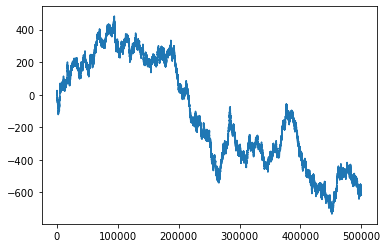

In [33]:
plt.plot(list(rw_generator(500000)))